In [5]:
import pandas as pd
df = pd.read_csv("NASA_Exoplanet_dataset.csv", comment='#')
df.head()

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.21000,0.06000,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,3.20000,...,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.76000,0.11000,...,-0.7140,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.03890,1.67709,...,-0.0073,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000,1.00000,...,-0.0111,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603


In [7]:
df.columns

Index(['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod',
       'disc_year', 'disc_facility', 'pl_controv_flag', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1',
       'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1',
       'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol',
       'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1',
       'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2',
       'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 

In [9]:
# as a Python list
cols = df.columns.tolist()
print(cols)


['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'pl_controv_flag', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim', 'st_metratio', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'rastr', 'ra',

In [11]:
EARTH_DENSITY = 5.51
SUN_TEMP = 5772

df["pl_density"] = (df["pl_bmasse"] / (df["pl_rade"]**3))
df["st_luminosity"] = (df["st_rad"]**2) * (df["st_teff"] / SUN_TEMP)**4


In [13]:
cols = [
    # IDs / names
    "pl_name",       # no objectid column in this file
    "hostname",

    # planet properties
    "pl_rade",       # radius (Earth radii)
    "pl_bmasse",     # mass (Earth masses)
    "pl_density",    
    "pl_eqt",        # equilibrium temperature
    "pl_orbper",     # orbital period
    "pl_orbsmax",    # semi-major axis
    "pl_insol",      # insolation flux

    # host star properties
    "st_teff",       # star effective temperature
    "st_luminosity",     
    "st_mass",       # star mass
    "st_rad",        # star radius
    "st_met",        # metallicity
    "st_spectype"    # spectral type
]

df_feat = df[cols].copy()
df_feat.head()


,pl_name,hostname,pl_rade,pl_bmasse,pl_density,pl_eqt,pl_orbper,pl_orbsmax,pl_insol,st_teff,st_luminosity,st_mass,st_rad,st_met,st_spectype
0,11 Com b,11 Com,12.2,4914.898486,2.706668,NaN,323.21000,1.178,NaN,4874.0,96.266166,2.09,13.76,-0.2600,G8 III
1,11 UMi b,11 UMi,12.3,4684.814200,2.517544,NaN,516.21997,1.530,NaN,4213.0,251.884564,2.78,29.79,-0.0200,K4 III
2,14 And b,14 And,13.1,1131.151301,0.503161,NaN,186.76000,0.775,NaN,4888.0,68.609376,1.78,11.55,-0.2100,K0 III
3,14 Her b,14 Her,12.6,2559.472162,1.279496,NaN,1765.03890,2.774,NaN,5338.0,0.632667,0.91,0.93,0.4052,K0V
4,16 Cyg B b,16 Cyg B,13.5,565.737400,0.229940,NaN,798.50000,1.660,NaN,5750.0,1.257543,1.08,1.13,0.0600,G3 V


In [15]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6052 entries, 0 to 6051
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pl_name        6052 non-null   object 
 1   hostname       6052 non-null   object 
 2   pl_rade        6027 non-null   float64
 3   pl_bmasse      6021 non-null   float64
 4   pl_density     6003 non-null   float64
 5   pl_eqt         4514 non-null   float64
 6   pl_orbper      5737 non-null   float64
 7   pl_orbsmax     5749 non-null   float64
 8   pl_insol       4247 non-null   float64
 9   st_teff        5776 non-null   float64
 10  st_luminosity  5751 non-null   float64
 11  st_mass        6045 non-null   float64
 12  st_rad         5754 non-null   float64
 13  st_met         5522 non-null   float64
 14  st_spectype    2231 non-null   object 
dtypes: float64(12), object(3)
memory usage: 709.3+ KB


In [17]:
df_feat.isnull().sum()

pl_name             0
hostname            0
pl_rade            25
pl_bmasse          31
pl_density         49
pl_eqt           1538
pl_orbper         315
pl_orbsmax        303
pl_insol         1805
st_teff           276
st_luminosity     301
st_mass             7
st_rad            298
st_met            530
st_spectype      3821
dtype: int64

In [19]:
# list only existing numeric columns
num_cols = [
    "pl_rade",
    "pl_bmasse",
    "pl_eqt",
    "pl_density",
    "pl_orbper",
    "pl_orbsmax",
    "st_luminosity",
    "pl_insol",
    "st_teff",
    "st_mass",
    "st_rad",
    "st_met",
]

# fill NaN with column means (in-place)
df_feat[num_cols] = df_feat[num_cols].fillna(df_feat[num_cols].mean())
df_feat.isnull().sum()

pl_name             0
hostname            0
pl_rade             0
pl_bmasse           0
pl_density          0
pl_eqt              0
pl_orbper           0
pl_orbsmax          0
pl_insol            0
st_teff             0
st_luminosity       0
st_mass             0
st_rad              0
st_met              0
st_spectype      3821
dtype: int64

In [21]:
df_feat.duplicated().sum()

0

In [23]:
df_feat["st_spectype"] = df_feat["st_spectype"].fillna(
    df_feat["st_spectype"].mode()[0]
)


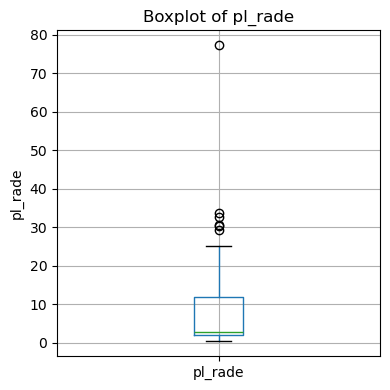

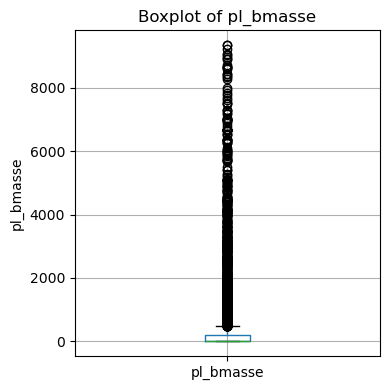

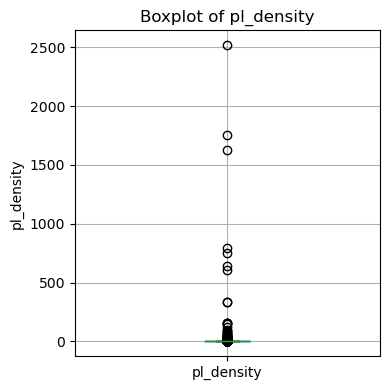

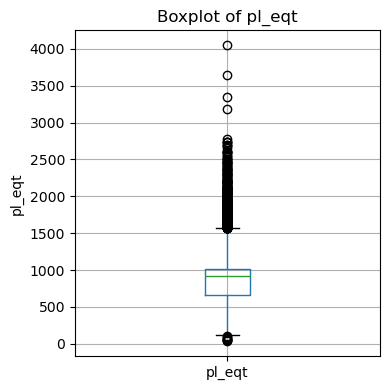

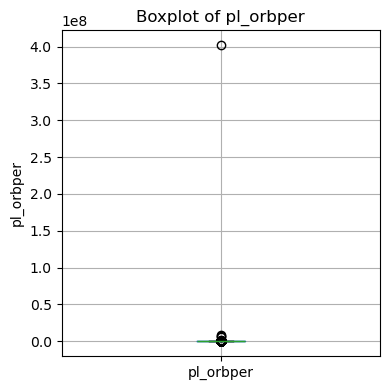

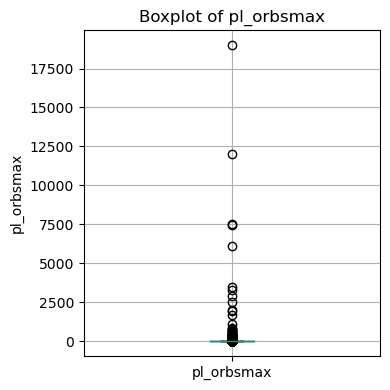

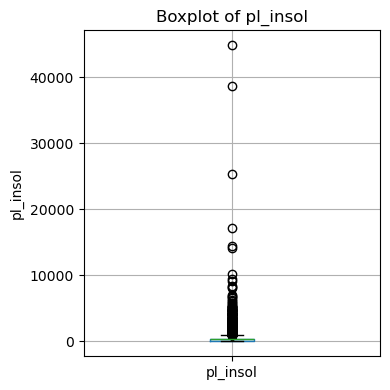

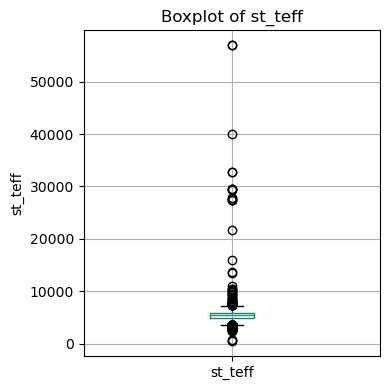

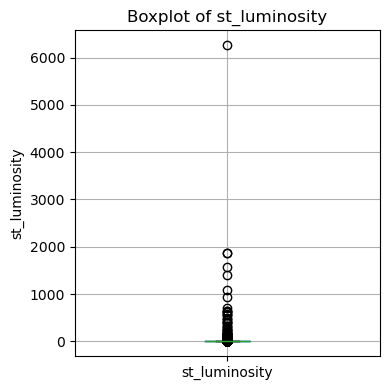

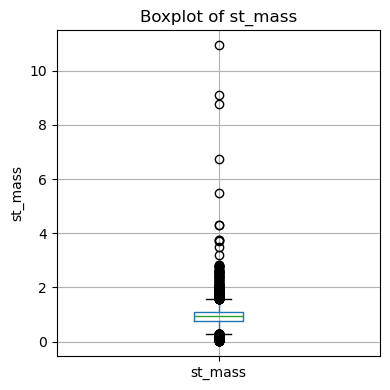

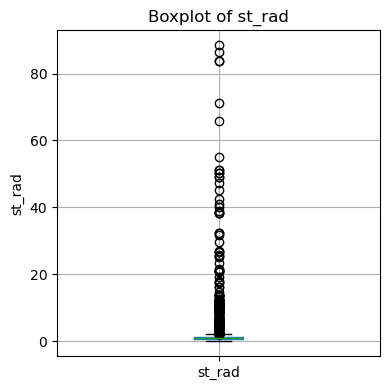

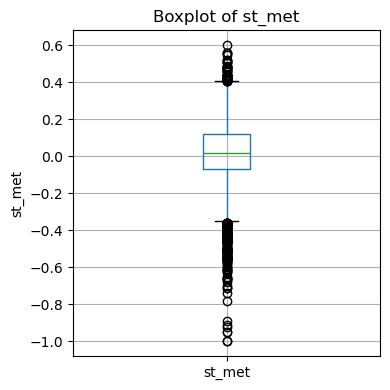

In [25]:
import matplotlib.pyplot as plt

# get numeric column names
num_cols = df_feat.select_dtypes(include=["number"]).columns

for col in num_cols:
    plt.figure(figsize=(4, 4))
    df_feat.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


In [26]:
num_cols = df_feat.select_dtypes(include=["number"]).columns

Q1 = df_feat[num_cols].quantile(0.25)
Q3 = df_feat[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outlier_mask = (df_feat[num_cols] < lower) | (df_feat[num_cols] > upper)

for col in num_cols:
    print(col, "outliers:", outlier_mask[col].sum())


pl_rade outliers: 6
pl_bmasse outliers: 966
pl_density outliers: 407
pl_eqt outliers: 479
pl_orbper outliers: 1192
pl_orbsmax outliers: 1190
pl_insol outliers: 459
st_teff outliers: 358
st_luminosity outliers: 765
st_mass outliers: 438
st_rad outliers: 337
st_met outliers: 274


In [27]:
import numpy as np

# only columns that actually exist in df_feat
num_cols = [
    "pl_rade",
    "pl_bmasse",
    "pl_eqt",
    "pl_density",
    "pl_orbper",
    "pl_orbsmax",
    "st_luminosity",
    "pl_insol",
    "st_teff",
    "st_mass",
    "st_rad",
    "st_met",
]

# 1) Detect outliers and print counts BEFORE replacement (original IQR)
Q1 = df_feat[num_cols].quantile(0.25)
Q3 = df_feat[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outlier_mask = (df_feat[num_cols] < lower) | (df_feat[num_cols] > upper)

print("Outliers BEFORE replacement (original IQR):")
for col in num_cols:
    print(col, "outliers:", outlier_mask[col].sum())

# 2) Replace those original outliers with the column median
for col in num_cols:
    median = df_feat[col].median()
    df_feat.loc[outlier_mask[col], col] = median

# 3) Re-check outliers using the same original bounds
outlier_mask_after = (df_feat[num_cols] < lower) | (df_feat[num_cols] > upper)

print("\nOutliers AFTER replacement (using original IQR bounds):")
for col in num_cols:
    print(col, "outliers:", outlier_mask_after[col].sum())


Outliers BEFORE replacement (original IQR):
pl_rade outliers: 6
pl_bmasse outliers: 966
pl_eqt outliers: 479
pl_density outliers: 407
pl_orbper outliers: 1192
pl_orbsmax outliers: 1190
st_luminosity outliers: 765
pl_insol outliers: 459
st_teff outliers: 358
st_mass outliers: 438
st_rad outliers: 337
st_met outliers: 274

Outliers AFTER replacement (using original IQR bounds):
pl_rade outliers: 0
pl_bmasse outliers: 0
pl_eqt outliers: 0
pl_density outliers: 0
pl_orbper outliers: 0
pl_orbsmax outliers: 0
st_luminosity outliers: 0
pl_insol outliers: 0
st_teff outliers: 0
st_mass outliers: 0
st_rad outliers: 0
st_met outliers: 0


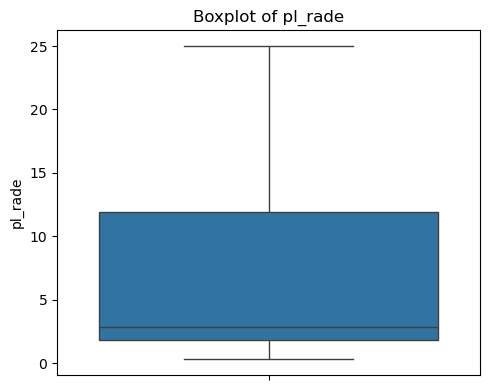

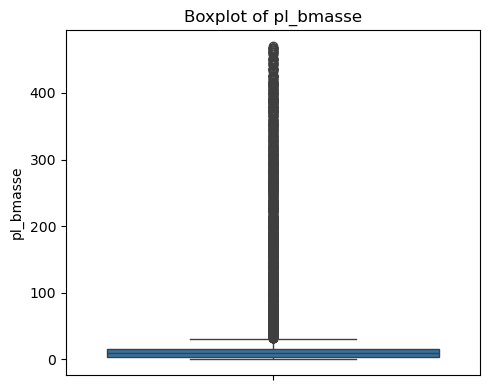

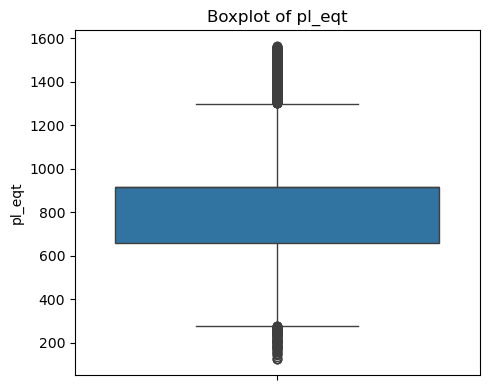

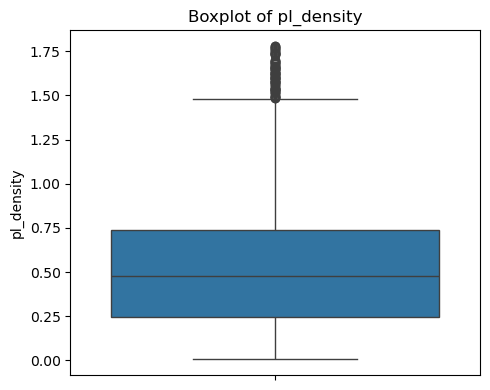

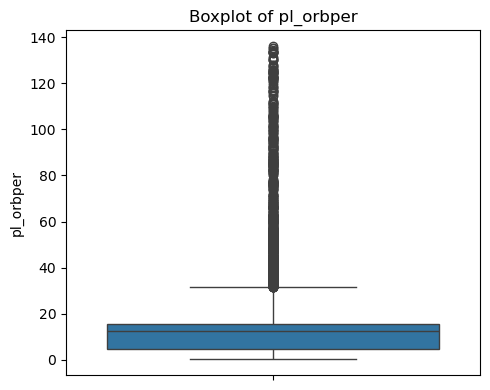

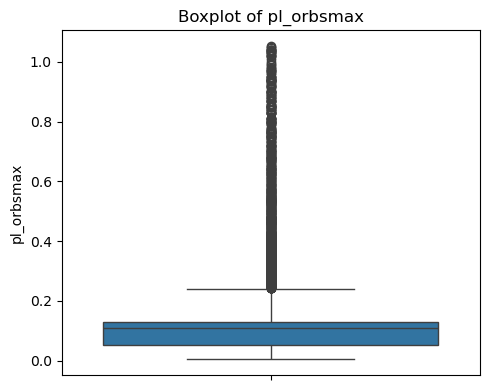

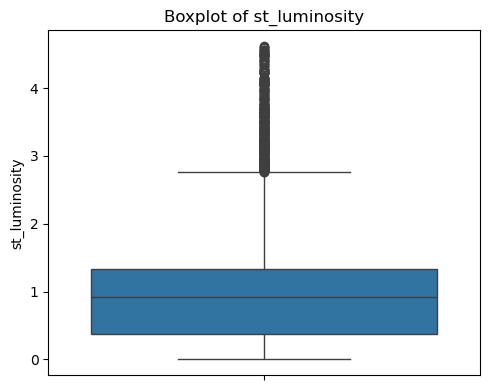

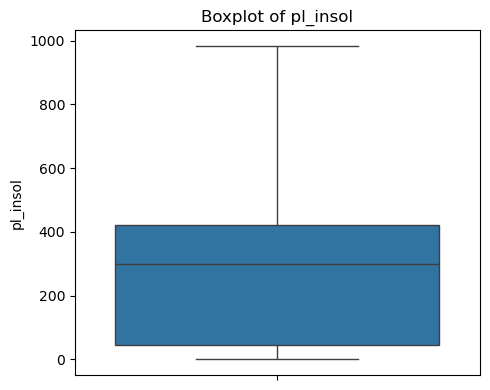

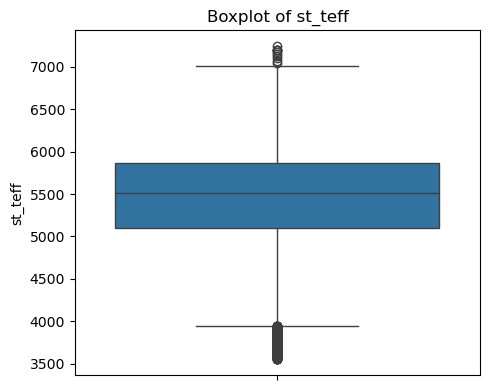

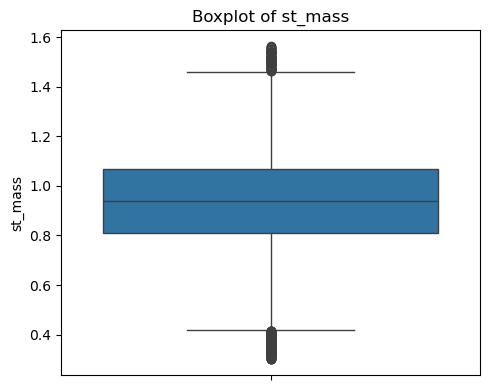

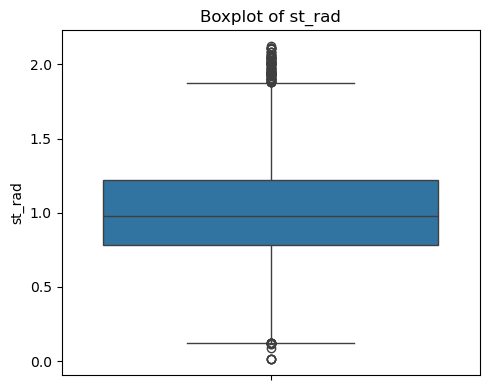

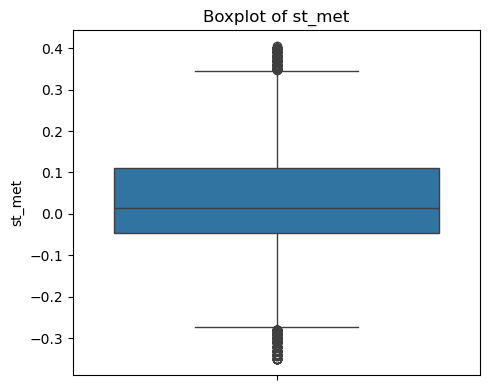

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# only real numeric columns from df_feat
num_cols =  [
    "pl_rade",
    "pl_bmasse",
    "pl_eqt",
    "pl_density",
    "pl_orbper",
    "pl_orbsmax",
    "st_luminosity",
    "pl_insol",
    "st_teff",
    "st_mass",
    "st_rad",
    "st_met",
]

for col in num_cols:
    plt.figure(figsize=(5, 4))
    sns.boxplot(y=df_feat[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()


In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

habitability_features = [
    "pl_rade",      # radius
    "pl_density",   # density (you created earlier)
    "pl_eqt",       # equilibrium temperature
    "pl_orbsmax",   # semi-major axis
]

df_feat[habitability_features] = scaler.fit_transform(
    df_feat[habitability_features]
)
df_feat["habitability_score"] = (
    0.30 * (1 - (df_feat["pl_rade"]    - 0.5).abs()) +
    0.30 * (1 - (df_feat["pl_density"] - 0.5).abs()) +
    0.25 * (1 - (df_feat["pl_eqt"]     - 0.5).abs()) +
    0.15 * (1 - (df_feat["pl_orbsmax"] - 0.5).abs())
)
threshold = df_feat["habitability_score"].median()
df_feat["habitability_class"] = (df_feat["habitability_score"] >= threshold).astype(int)


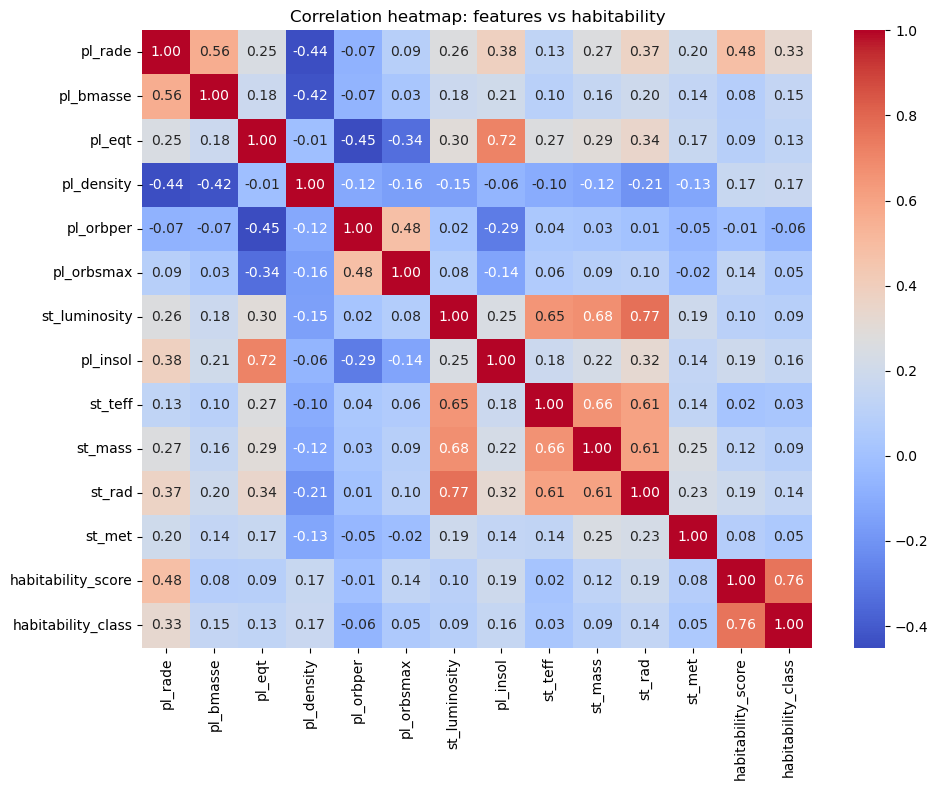

In [30]:
# overwrite feature_cols with only existing columns
feature_cols =  [
    "pl_rade",
    "pl_bmasse",
    "pl_eqt",
    "pl_density",
    "pl_orbper",
    "pl_orbsmax",
    "st_luminosity",
    "pl_insol",
    "st_teff",
    "st_mass",
    "st_rad",
    "st_met",
]

cols_for_heatmap = feature_cols + ["habitability_score", "habitability_class"]

corr = df_feat[cols_for_heatmap].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap: features vs habitability")
plt.tight_layout()
plt.show()


In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# choose candidate numeric features
base_features =  [
    "pl_rade",
    "pl_bmasse",
    "pl_eqt",
    "pl_density",
    "pl_orbper",
    "pl_orbsmax",
    "st_luminosity",
    "pl_insol",
    "st_teff",
    "st_mass",
    "st_rad",
    "st_met",
]

# target: binary class (you already created)
y = df_feat["habitability_class"]

# correlation with habitability_class
corr = df_feat[base_features + ["habitability_class"]].corr()["habitability_class"].abs().sort_values(ascending=False)
print(corr)

# pick top K features (excluding the target itself)
K = 8
selected_features = corr.drop("habitability_class").head(K).index.tolist()
print("Selected features:", selected_features)

X = df_feat[selected_features]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


habitability_class    1.000000
pl_rade               0.331194
pl_density            0.167871
pl_insol              0.155294
pl_bmasse             0.146033
st_rad                0.144400
pl_eqt                0.127577
st_mass               0.091405
st_luminosity         0.090797
pl_orbper             0.061266
pl_orbsmax            0.050344
st_met                0.047605
st_teff               0.030635
Name: habitability_class, dtype: float64
Selected features: ['pl_rade', 'pl_density', 'pl_insol', 'pl_bmasse', 'st_rad', 'pl_eqt', 'st_mass', 'st_luminosity']


In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

num_features = [f for f in selected_features if f != "st_spectype"]
cat_features = ["st_spectype"] if "st_spectype" in df_feat.columns else []

X = df_feat[num_features + cat_features]
y = df_feat["habitability_class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features),
    ]
)

# common preprocessing + feature selection
preprocess_and_select = Pipeline(steps=[
    ("preprocess", preprocess),
    ("select", SelectKBest(score_func=f_classif, k="all")),  # or int k
])


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)

models = {
    "RandomForest": RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        random_state=42,
        class_weight="balanced"
    ),
    "XGBoost": XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        max_depth=3,
        learning_rate=0.05,
        n_estimators=150,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        random_state=42
    ),
}

results = []

for name, clf in models.items():
    pipe = Pipeline(steps=[
        ("preprocess_select", preprocess_and_select),
        ("model", clf),
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    if hasattr(pipe.named_steps["model"], "predict_proba"):
        y_prob = pipe.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = None

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)

    results.append({
        "model": name,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": auc,
    })

results_df = pd.DataFrame(results).sort_values("accuracy", ascending=False)
print(results_df)


          model  accuracy  precision    recall        f1   roc_auc
1       XGBoost  0.934765   0.953448  0.914050  0.933333  0.985620
0  RandomForest  0.933939   0.947189  0.919008  0.932886  0.981315


In [34]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

best_model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    max_depth=3,
    learning_rate=0.05,
    n_estimators=150,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42
)

final_pipe = Pipeline(steps=[
    ("preprocess_select", preprocess_and_select),
    ("model", best_model),
])

final_pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocess_select',
                 Pipeline(steps=[('preprocess',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   ['pl_rade',
                                                                    'pl_density',
                                                                    'pl_insol',
                                                                    'pl_bmasse',
                                                                    'st_rad',
                                                                    'pl_eqt',
                                                                    'st_mass',
                                                                    'st_luminosity']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='mo...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=150, n_jobs=None,
                               num_parallel_tree=None, ...))])

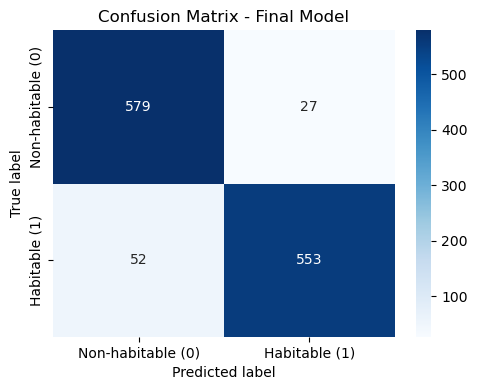

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       606
           1       0.95      0.91      0.93       605

    accuracy                           0.93      1211
   macro avg       0.94      0.93      0.93      1211
weighted avg       0.94      0.93      0.93      1211



In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    precision_recall_curve
)

# 1. Get predictions and probabilities from final model
y_pred = final_pipe.predict(X_test)
y_prob = final_pipe.predict_proba(X_test)[:, 1]  # prob of class 1

# 2. Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=["Non-habitable (0)", "Habitable (1)"],
            yticklabels=["Non-habitable (0)", "Habitable (1)"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Final Model")
plt.tight_layout()
plt.show()

print("Classification report:")
print(classification_report(y_test, y_pred))




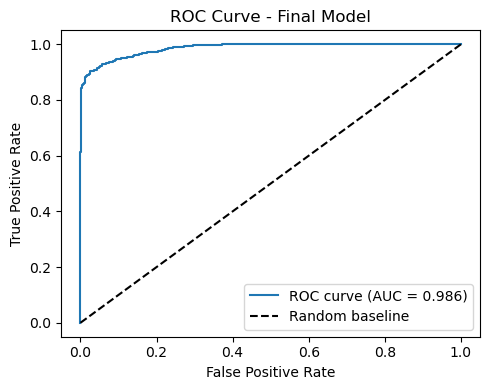

In [36]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Random baseline")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Final Model")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


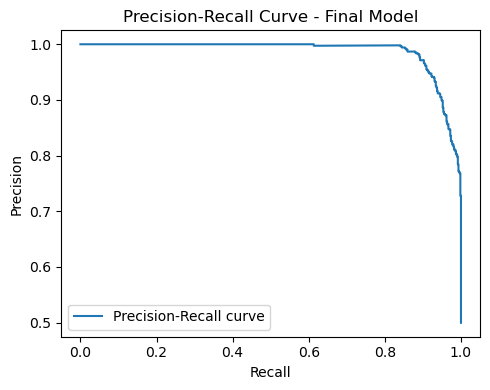

In [37]:
precisions, recalls, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(5, 4))
plt.plot(recalls, precisions, label="Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Final Model")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

In [55]:
from joblib import dump  # or: import joblib

# save
dump(final_pipe, "habitability_xgb_model.joblib")
# or: joblib.dump(final_pipe, "habitability_xgb_model.joblib")

print("XGBoost pipeline saved successfully")


XGBoost pipeline saved successfully
